In [1]:
!git clone https://github.com/ucfilho/ANN

Cloning into 'ANN'...
remote: Counting objects: 29, done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 7), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [2]:
%cd ANN

/content/ANN


In [3]:
! ls

ann_aula_ago_14_2018_leitura_git.ipynb	Hydrofoil_ago_29_2018.csv
ANN_Hydrofoil_ago_29_2018.txt.ipynb	john_mccarthy.png
arvore.jpg				Paper_Carvao_China_abril_12_2016.csv
BBC_007041008.wav			Paper_Carvao_China_mar_31_2016.txt
Criando_Gethub_Ver_Youtube.txt		README.md
FAULT_DIAGNOSIS_maio_25_2017.txt


In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")
print(DAT.head())

   Unnamed: 0  Case  Hydrofoil    Froude  Resistence   Sinkage      Trim  \
0           1     1          1  0.000000    0.000000  0.000000  0.000000   
1           2     2          1  0.103733    2.549729 -0.689028  1.353022   
2           3     3          1  0.124480    3.628461 -0.835413  1.346323   
3           4     4          1  0.165973    6.374322 -1.864337  1.361538   
4           5     5          1  0.186719    8.217973 -2.301539  1.378858   

      Power  
0  0.000000  
1  0.950991  
2  1.624000  
3  3.803965  
4  5.517212  


In [6]:
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [7]:
print(Dat_Select.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
Hydrofoil     59 non-null int64
Froude        59 non-null float64
Resistence    59 non-null float64
Sinkage       59 non-null float64
Trim          59 non-null float64
Power         59 non-null float64
dtypes: float64(5), int64(1)
memory usage: 2.8 KB
None


In [8]:
# normatizando os dados (existe forma automatica de fazer nao discutiremos
def normalizeCols(M):
    Num=len(M.columns)
    for i in range(Num):
        #Max=M.iloc[:,[i]].max()
        Max=float(np.max(M.iloc[:,[i]]))
        #Min=M.iloc[:,[i]].min()
        Min=float(np.min(M.iloc[:,[i]]))
        a=(Max+Min)/2
        b=(Max-Min)/2
        M.iloc[:,[i]] = M.iloc[:,[i]].apply(lambda x: (x-a)/b)
    return M
DAT=normalizeCols(Dat_Select)
print(Dat_Select.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0       -1.0 -1.000000   -1.000000 -0.883085 -1.000000 -1.000000
1       -1.0 -0.913570   -0.986458 -0.895478 -0.459481 -0.999415
2       -1.0 -0.896283   -0.980729 -0.898111 -0.462157 -0.999001
3       -1.0 -0.861711   -0.966146 -0.916618 -0.456079 -0.997659
4       -1.0 -0.844425   -0.956354 -0.924482 -0.449160 -0.996605


In [9]:
X=DAT.iloc[:,[2,3]]
print(X.head())

   Resistence   Sinkage
0   -1.000000 -0.883085
1   -0.986458 -0.895478
2   -0.980729 -0.898111
3   -0.966146 -0.916618
4   -0.956354 -0.924482


In [10]:
Index=[2,3,4,5]
Dat_Select=[]
Y=DAT.iloc[:,Index].copy()
print(Y.head())

   Resistence   Sinkage      Trim     Power
0   -1.000000 -0.883085 -1.000000 -1.000000
1   -0.986458 -0.895478 -0.459481 -0.999415
2   -0.980729 -0.898111 -0.462157 -0.999001
3   -0.966146 -0.916618 -0.456079 -0.997659
4   -0.956354 -0.924482 -0.449160 -0.996605


In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(9, 8), 
                    random_state=1)

In [13]:
clf.fit(X, Y)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
W=clf.predict(X)

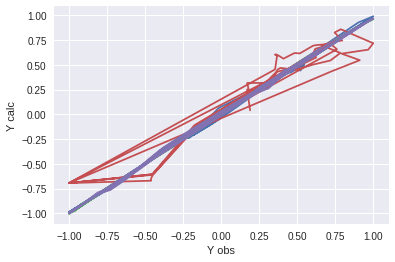

In [15]:
# plot results
plt.plot(Y,W)
plt.xlabel('Y obs')
plt.ylabel('Y calc')
plt.show()

In [16]:
print(Y.head())

   Resistence   Sinkage      Trim     Power
0   -1.000000 -0.883085 -1.000000 -1.000000
1   -0.986458 -0.895478 -0.459481 -0.999415
2   -0.980729 -0.898111 -0.462157 -0.999001
3   -0.966146 -0.916618 -0.456079 -0.997659
4   -0.956354 -0.924482 -0.449160 -0.996605


In [17]:
print(W[0:5,:])

[[-0.98921908 -0.87595775 -0.6938366  -0.99425289]
 [-0.97575398 -0.88631568 -0.67005453 -0.99546812]
 [-0.9709029  -0.88897324 -0.66135622 -0.99568143]
 [-0.9542352  -0.90387232 -0.63287204 -0.99682311]
 [-0.94451885 -0.9108571  -0.61615148 -0.99703854]]


In [18]:
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [19]:
def normalizeCols(M):
    Num=len(M.columns)
    for i in range(Num):
        Max=float(np.max(M.iloc[:,[i]]))
        Min=float(np.min(M.iloc[:,[i]]))
        M.iloc[:,[i]] = M.iloc[:,[i]].apply(lambda x: 0.8*(x-Min)/(Max-Min)+0.1)
    return M
DAT=normalizeCols(Dat_Select)
print(Dat_Select.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0        0.1  0.100000    0.100000  0.146766  0.100000  0.100000
1        0.1  0.134572    0.105417  0.141809  0.316207  0.100234
2        0.1  0.141487    0.107708  0.140756  0.315137  0.100400
3        0.1  0.155315    0.113542  0.133353  0.317568  0.100936
4        0.1  0.162230    0.117458  0.130207  0.320336  0.101358


In [20]:
X=Dat_Select.iloc[:,[0,1]]
print(X.head())

   Hydrofoil    Froude
0        0.1  0.100000
1        0.1  0.134572
2        0.1  0.141487
3        0.1  0.155315
4        0.1  0.162230


In [21]:
Index=[2,3,4,5]
Y=Dat_Select.iloc[:,Index].copy()
print(Y.head())

   Resistence   Sinkage      Trim     Power
0    0.100000  0.146766  0.100000  0.100000
1    0.105417  0.141809  0.316207  0.100234
2    0.107708  0.140756  0.315137  0.100400
3    0.113542  0.133353  0.317568  0.100936
4    0.117458  0.130207  0.320336  0.101358


In [0]:
clf = MLPRegressor(solver='lbfgs',activation='logistic',alpha=1e-5,hidden_layer_sizes=(9,8), 
                    random_state=1)

In [23]:
clf.fit(X, Y)

MLPRegressor(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
W=clf.predict(X)

Text(0,0.5,'Y calc')

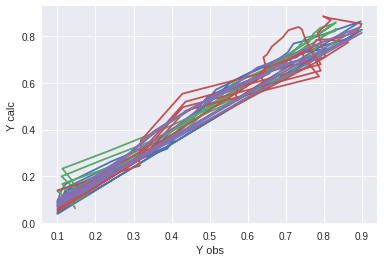

In [25]:
# plot results
#plt.plot(Y,W)
plt.plot(Y,W)
plt.xlabel('Y obs')
plt.ylabel('Y calc')

In [26]:
print(Y.head())

   Resistence   Sinkage      Trim     Power
0    0.100000  0.146766  0.100000  0.100000
1    0.105417  0.141809  0.316207  0.100234
2    0.107708  0.140756  0.315137  0.100400
3    0.113542  0.133353  0.317568  0.100936
4    0.117458  0.130207  0.320336  0.101358


In [27]:
print(W[0:5,:])

[[0.07244455 0.06173837 0.13971481 0.08741358]
 [0.11855188 0.07536235 0.24468014 0.09477129]
 [0.1280572  0.07830064 0.26612919 0.09639552]
 [0.14726431 0.0844911  0.30915388 0.09984081]
 [0.15694352 0.08776906 0.3306443  0.10167327]]
